In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
import spacy
#from spacy import attrs

nlp = spacy.load('en', vectors=False)
doc = nlp(u'Bob bought the pizza to Alice')

for sent in doc.sents:
     for i, word in enumerate(sent):
         if word.head is word:
             head_idx = 0
         else:
            head_idx = doc[i].head.i+1
            
         print("%d\t%s\t%s\t%s\t%s\t%s\t%d\t%s\t%s\t%s"%(
             i+1, # There's a word.i attr that's position in *doc*
             word, # If you want the base-form, you have to change it for "word.lemma_,"
             '_',
             word.pos_, # Coarse-grained tag
             word.tag_, # Fine-grained tag
             '_',
             head_idx,
             word.dep_, # Relation
'_', '_'))

1	Bob	_	PROPN	NNP	_	2	nsubj	_	_
2	bought	_	VERB	VBD	_	0	ROOT	_	_
3	the	_	DET	DT	_	4	det	_	_
4	pizza	_	NOUN	NN	_	2	dobj	_	_
5	to	_	ADP	IN	_	2	prep	_	_
6	Alice	_	PROPN	NNP	_	5	pobj	_	_


In [3]:
import spacy
from nltk import Tree
nlp = spacy.load('en')

doc = nlp(u'Bob bought the pizza to Alice')

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        print("%s%s"%(
             node.lemma_, # or "node.orth_," with original form
             ','))
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        print("%s%s"%(
             node.lemma_, # or "node.orth_," with original form
             ';'))
        return node.orth_
print('[')
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]


[
buy,
bob;
pizza,
the;
to,
alice;
    bought      
  ____|______    
 |  pizza    to 
 |    |      |   
Bob  the   Alice



[None]

In [4]:
import spacy
from nltk import Tree
nlp = spacy.load('en')

doc = nlp(u'Bob bought the pizza to Alice')

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        print("%s%s"%(
             node.lemma_, # or "node.orth_," with original form
             ','))
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        print("%s%s"%(
             node.lemma_, # or "node.orth_," with original form
             ';'))
        return node.orth_
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

buy,
bob;
pizza,
the;
to,
alice;
    bought      
  ____|______    
 |  pizza    to 
 |    |      |   
Bob  the   Alice



[None]

In [5]:
def parse_sentence(nlp, sentence):
    """Parse unicode sentence into a NLTK tree
    using the spacy parser"""
    doc = nlp(sentence)
    trees = [tree_sentence(s.root) for s in doc.sents]
    assert len(trees) == 1
    return trees[0]

def tree_sentence(node):
    from nltk import Tree
    if node.pos_ in ('VERB', 'NOUN', 'DET'):
        tag = node.lemma_
    else:
        tag = node.orth_

    if node.n_lefts + node.n_rights > 0:
        return Tree(tag, [tree_sentence(child) for child in node.children])
    else:
        return tag

def parse_tree(nlp, sentence):
    """Parse tag sentence into a NLTK tree
    using the spacy parser"""
    doc = nlp(sentence)
    trees = [tree_tree(s.root) for s in doc.sents]
    assert len(trees) == 1
    return trees[0]

def tree_tree(node):
    from nltk import Tree
    
    tag = node.tag_

    if node.n_lefts + node.n_rights > 0:
        return Tree(tag, [tree_tree(child) for child in node.children])
    else:
        return tag

In [6]:
import spacy
nlp = spacy.load('en')

In [17]:
def categorical(s):
    if (s == 'every' or s == 'all'):
        return 'FORALL'
    else:
        return 'EXISTS'

In [18]:
def propi(s):
    if (s == 'andreu' or s=='mickey' or s=='jordi' or s=='alejandro'):
        return 'EXISTS'
    else: return 'FORALL'

In [19]:
if __name__ == '__main__':
    sentences = []
    trees = []
    while True:
        new_text = input('> ')
        if not new_text: break
        sentences.append(parse_sentence(nlp, (new_text)))
        trees.append(parse_tree(nlp, (new_text)))

    for s in sentences:
        print(s.pretty_print())

    for t in trees:
        print(t)
        
res = []
count = 0
index = 1
for i in range(len(sentences[0])):
    if (type(sentences[0][0])==str and type(sentences[0][1])==str and count==0): 
        res.append(propi(sentences[0][0]))
        res.append([])
        count += 1
        res[1].append('(AND)')
        res[1].append(sentences[0][0])
    if (type(sentences[0][i])==str and i!=0): res[index].append(sentences[0][i])
    if (type(sentences[0][i])!=str):
        if(t[i].label()=='NN' or t[i].label()=='NNS'): 
            for j in range(len(sentences[0][i])):
                if(t[i][j]=='DT' and count == 0): 
                    res.append(categorical(sentences[0][i][j]))
                    res.append([])
                    res[1].append('(AND)')
                    count += 1
                else: 
                    if (t[i][j]!='DT'):
                        res[index].append(sentences[0][i][j])
            res[index].append(sentences[0][i].label())
print(res)

# numeros per variables (afegirlos) impliques/ands veure pertinencia

> every swede is a scandinavian
> 
       be             
   ____|_______        
swede     scandinavian
  |            |       
every          a      

None
(VBZ (NN DT) (NN DT))
['FORALL', ['(AND)', 'swede', 'scandinavian']]


In [252]:
type(sentences[0][0])

nltk.tree.Tree

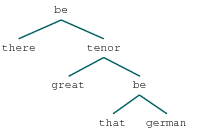

In [191]:
sentences[0]

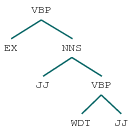

In [190]:
t

In [126]:
t[0].label()

'NNS'

In [207]:
res= []
res.append(1)
res.append([])
res[1].append(2)
res

[1, [2]]

In [224]:
res = []
count = 0
index = 1
for i in range(len(sentences[0])):
    if (type(sentences[0][i])==str): res[index].append(sentences[0][i])
    else:
        if(t[i].label()=='NN' or t[i].label()=='NNS'): 
            for j in range(len(sentences[0][i])):
                if(t[i][j]=='DT' and count == 0): 
                    res.append(categorical(sentences[0][i][j]))
                    res.append([])
                    res[index].append('(AND)')
                    count += 1
                else: 
                    if (t[i][j]!='DT'):
                        res[index].append(sentences[0][i][j])
            res[index].append(sentences[0][i].label())
            

In [223]:
res

['EXISTS', ['(AND)', 'tenor', 'german']]

In [5]:
import spacy
nlp = spacy.load('en')

In [ ]:
parse_sentence(nlp, )